# Neural network model
`Keras` implementation

In [1]:

from math import floor

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
from keras.initializers import RandomNormal, Orthogonal

# note: RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#       Orthogonal(gain = 1.0, seed = None)

from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

from scipy import stats
import numpy as np

import pickle

Using TensorFlow backend.


In [2]:
dataSet_clean = False

if (dataSet_clean == True):
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_clean.pkl', 'rb')
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_noised.pkl', 'rb')
#end

DataSet = pickle.load(fileID)
fileID.close()

X = DataSet[0]
Y = DataSet[1]

print(type(X)," Dim: ",X.shape,"\n",X)
print(type(Y)," Dim: ",Y.shape,"\n",Y)
print("\n")

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 20)

print("X: train dims = {}, test dims = {}\n".format(Xtrain.shape, Xtest.shape))
print("Y: train dims = {}, test dims = {}\n".format(Ytrain.shape, Ytest.shape))

M = Xtrain.shape[1]
nCat = Ytrain.shape[1]

<class 'numpy.ndarray'>  Dim:  (2000, 31) 
 [[ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1.  1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]]
<class 'numpy.ndarray'>  Dim:  (2000, 4) 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


X: train dims = (1400, 31), test dims = (600, 31)

Y: train dims = (1400, 4), test dims = (600, 4)



In [3]:
%%time
model = Sequential()

normal_init = RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#orth_init = Orthogonal(gain = 1.0, seed = None)

model.add(Dense(input_dim = M, units = 20,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'relu'))
model.add(Dense(input_dim = M, units = 10,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'relu'))
model.add(Dense(units = nCat,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Wall time: 1.28 s


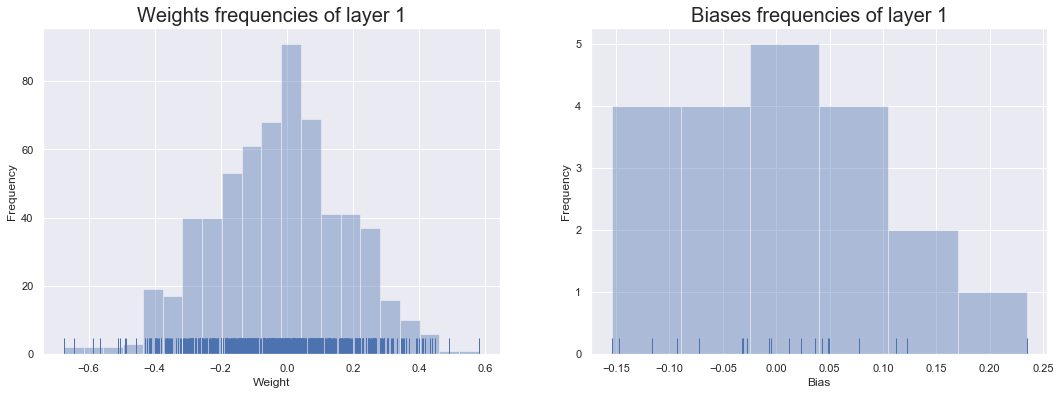

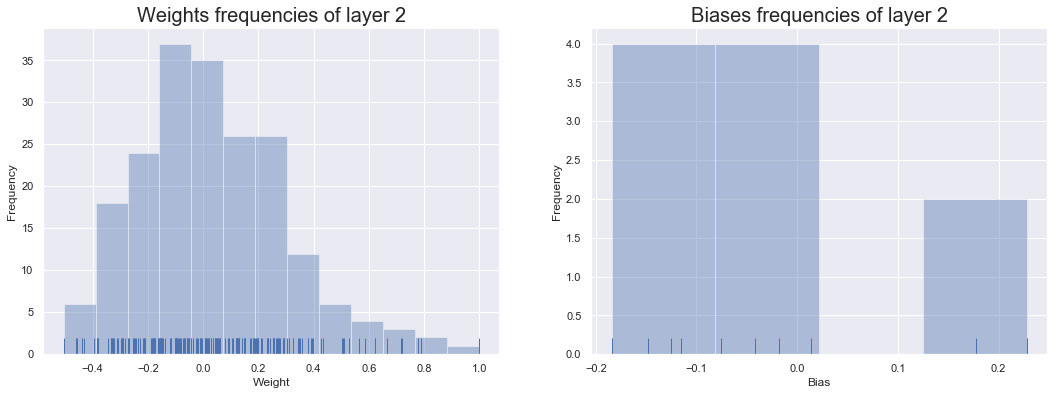

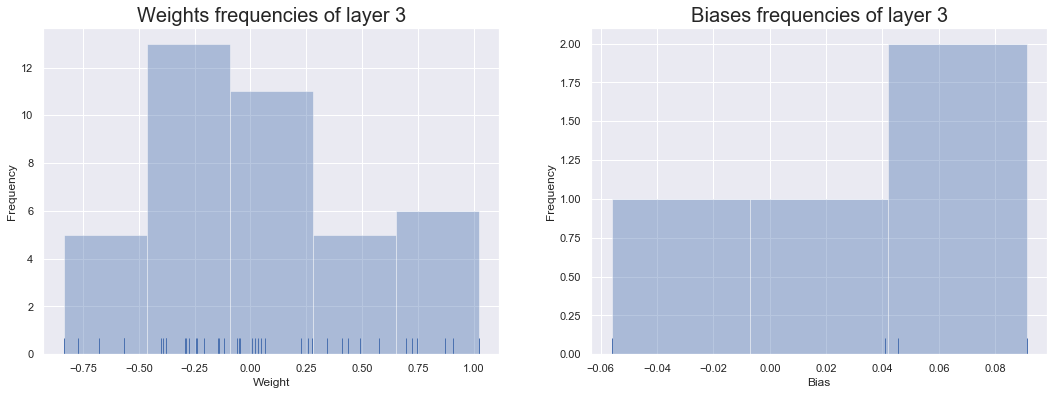

In [19]:
weights_pre = np.asarray(model.get_weights())

numLayers = len(model.layers)

for i in range(numLayers):
    j = 2*i
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    wghs = weights_pre[j].flatten()
    sns.distplot(wghs, rug=True, kde=False, norm_hist=False)
    title = "Weights frequencies of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Weight")
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    j = 2*i + 1
    wghs = weights_pre[j].flatten()
    sns.distplot(wghs, rug=True, kde=False, norm_hist=False)
    title = "Biases frequencies of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Bias")
    plt.ylabel("Frequency")
plt.show()

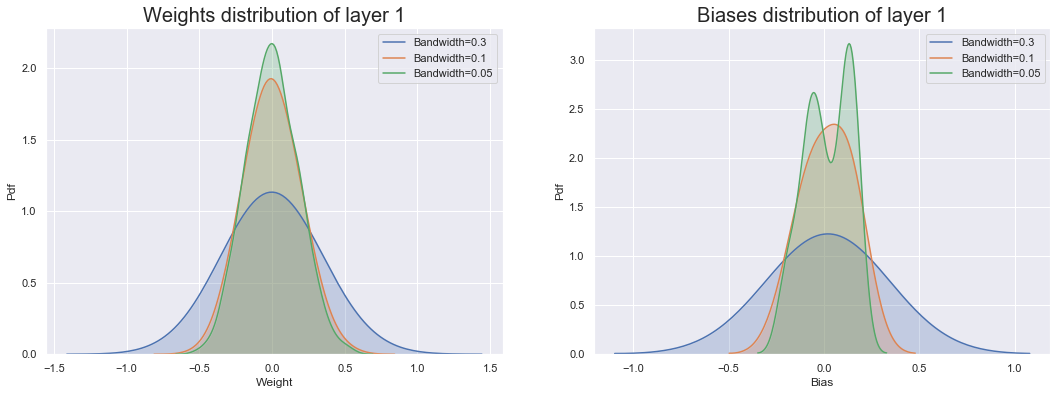

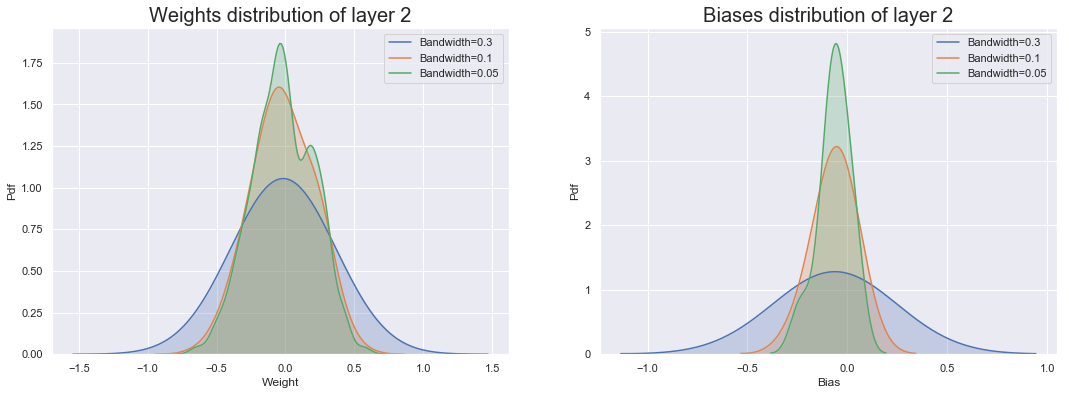

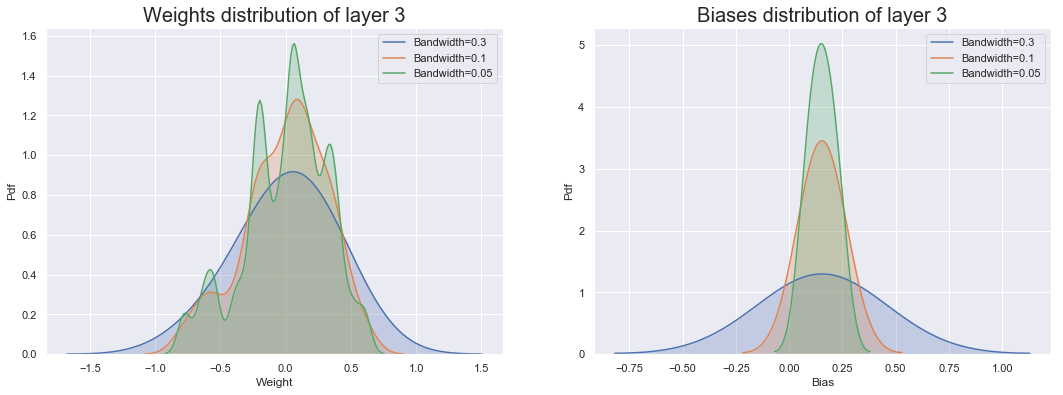

In [5]:

for i in range(numLayers):
    j = 2*i
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    wghs = weights_pre[j].flatten()
    sns.kdeplot(wghs, bw=.3, shade=True, label="Bandwidth=0.3")
    sns.kdeplot(wghs, bw=.1, shade=True, label="Bandwidth=0.1")
    sns.kdeplot(wghs, bw=.05, shade=True, label="Bandwidth=0.05")
    title = "Weights distribution of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Weight")
    plt.ylabel("Pdf")
    
    plt.subplot(1,2,2)
    j = 2*i + 1
    wghs = weights_pre[j].flatten()
    sns.kdeplot(wghs, bw=.3, shade=True, label="Bandwidth=0.3")
    sns.kdeplot(wghs, bw=.1, shade=True, label="Bandwidth=0.1")
    sns.kdeplot(wghs, bw=.05, shade=True, label="Bandwidth=0.05")
    title = "Biases distribution of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Bias")
    plt.ylabel("Pdf")
plt.show()

Instructions for updating:
Use tf.cast instead.
Train on 1260 samples, validate on 140 samples
Epoch 1/100
1260/1260 [==============================] - 6s 5ms/step - loss: 1.2153 - acc: 0.5048 - val_loss: 1.0454 - val_acc: 0.6500
Epoch 2/100
1260/1260 [==============================] - 1s 849us/step - loss: 0.8586 - acc: 0.7214 - val_loss: 0.7524 - val_acc: 0.7214
Epoch 3/100
1260/1260 [==============================] - 1s 608us/step - loss: 0.6224 - acc: 0.7889 - val_loss: 0.5568 - val_acc: 0.8286
Epoch 4/100
1260/1260 [==============================] - 2s 2ms/step - loss: 0.4776 - acc: 0.8524 - val_loss: 0.4425 - val_acc: 0.8714
Epoch 5/100
1260/1260 [==============================] - 1s 694us/step - loss: 0.3908 - acc: 0.8810 - val_loss: 0.3785 - val_acc: 0.8786
Epoch 6/100
1260/1260 [==============================] - 1s 930us/step - loss: 0.3377 - acc: 0.8913 - val_loss: 0.3341 - val_acc: 0.8786
Epoch 7/100
1260/1260 [==============================] - 1s 955us/step - loss: 0.3030 -

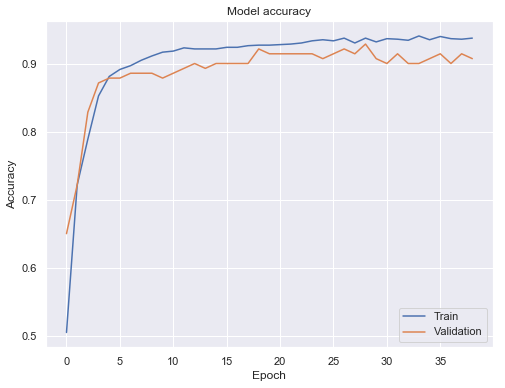

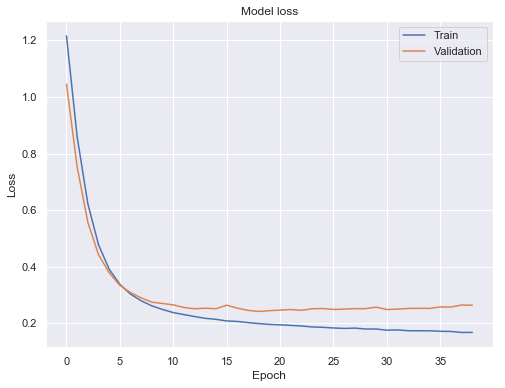

600/600 [==============================] - 0s 313us/step
Model evaluation on test data: loss and accuracy
 [0.22379141191641488, 0.9166666666666666]


In [4]:
es1 = EarlyStopping(monitor='val_acc', mode='auto', patience = 30, verbose = 1)
es2 = EarlyStopping(monitor='val_loss', mode='auto',patience = 20, verbose = 1)

sgd = keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.6, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(Xtrain, Ytrain, validation_split = 0.1, epochs = 100, verbose = 1, callbacks = [es1,es2])


plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


print("Model evaluation on test data: loss and accuracy\n",model.evaluate(Xtest,Ytest, verbose = 1))

# Weights distributions

In [5]:
weights = np.asarray(model.get_weights())

In [6]:
fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'wb')
pickle.dump(weights, fileID)
fileID.close()

In [39]:
fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'rb')
weights = pickle.load(fileID)
fileID.close()

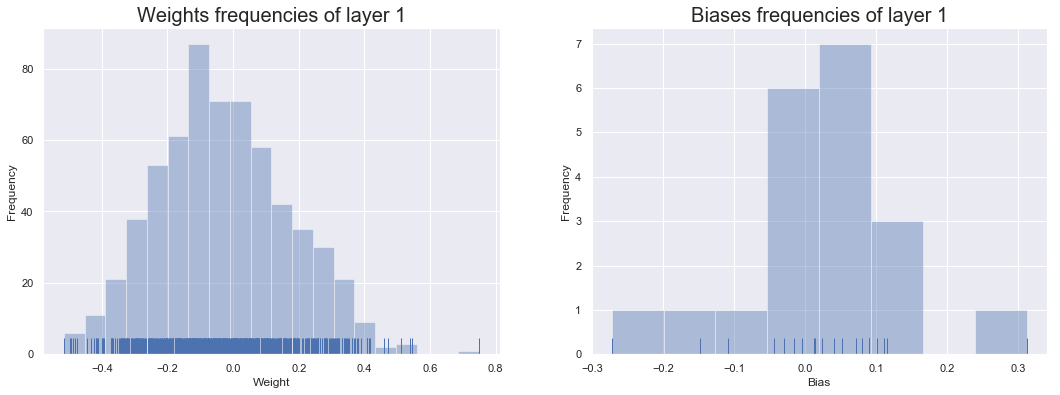

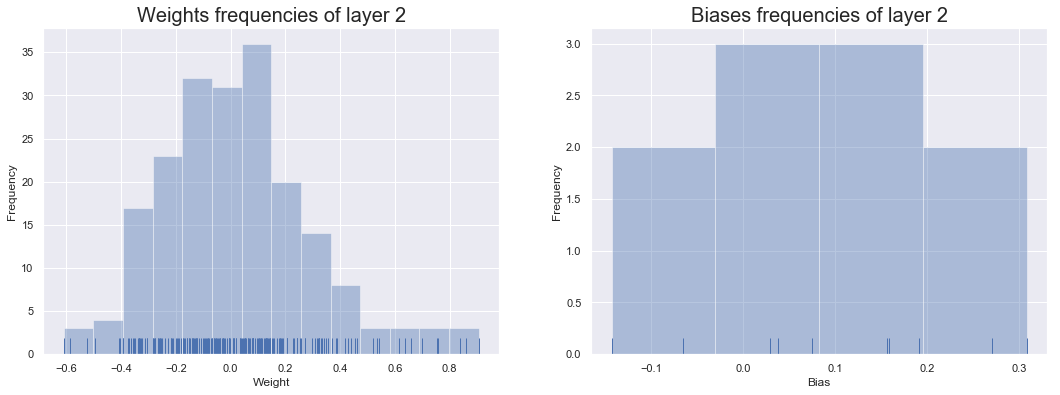

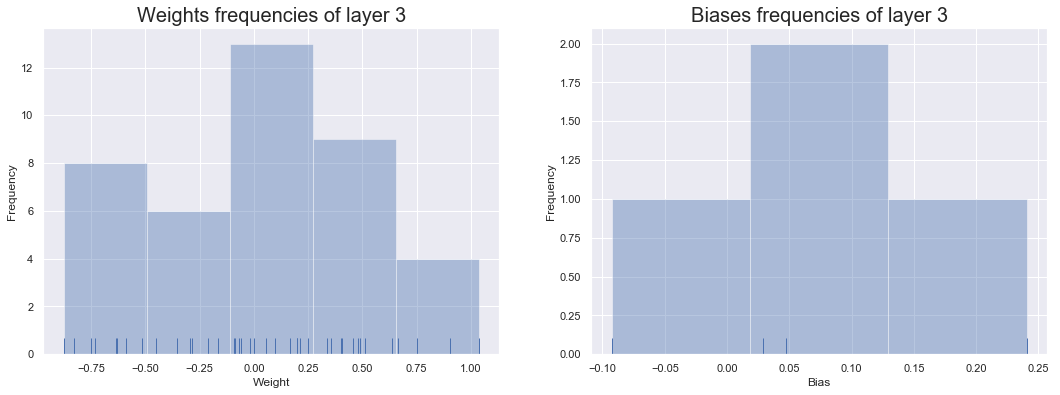

In [8]:
# weights is a 4 entry list.
# weights[0] is the  weights matrix of the input -> hidden layer
# weights[1] is the bias vector of the input -> hidden layer
# weights[2] is the  weights matrix of the hidden -> output layer
# weights[3] is the bias vector of the hidden -> output layer
numLayers = len(model.layers)

for i in range(numLayers):
    j = 2*i
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    wghs = weights[j].flatten()
    sns.distplot(wghs, rug=True, kde=False, norm_hist=False)
    title = "Weights frequencies of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Weight")
    plt.ylabel("Frequency")
    plt.subplot(1,2,2)
    j = 2*i + 1
    wghs = weights[j].flatten()
    sns.distplot(wghs, rug=True, kde=False, norm_hist=False)
    title = "Biases frequencies of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Bias")
    plt.ylabel("Frequency")
plt.show()

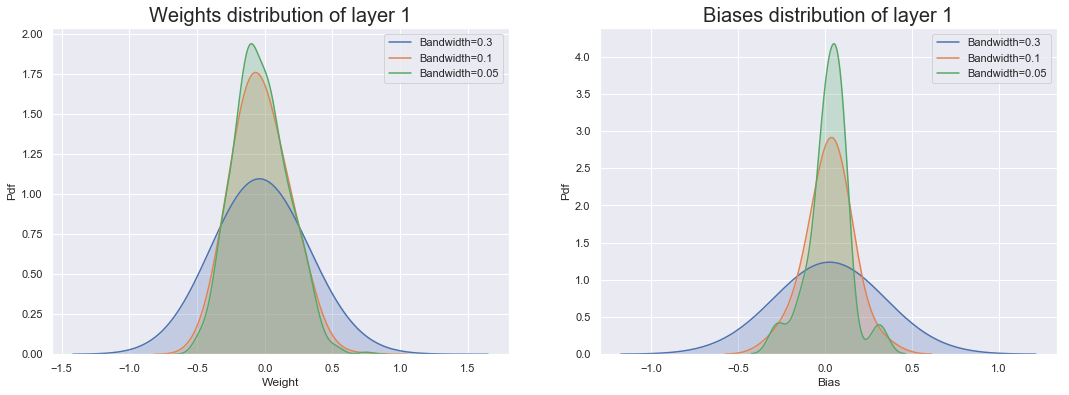

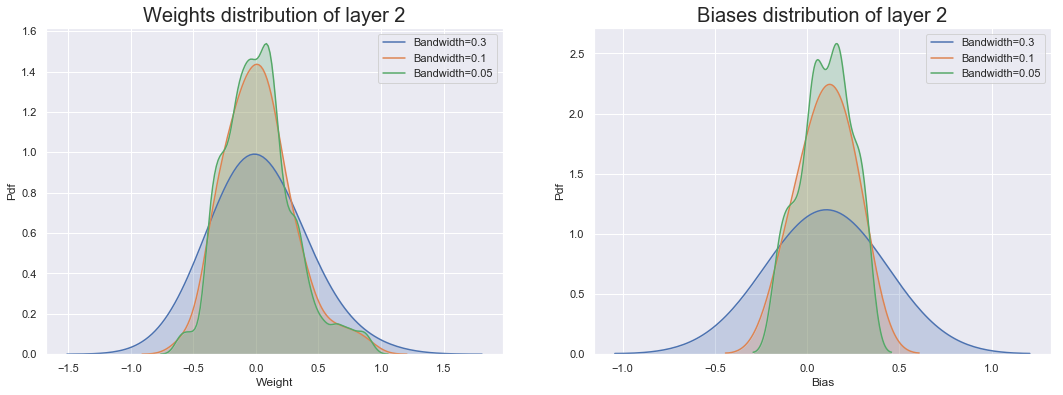

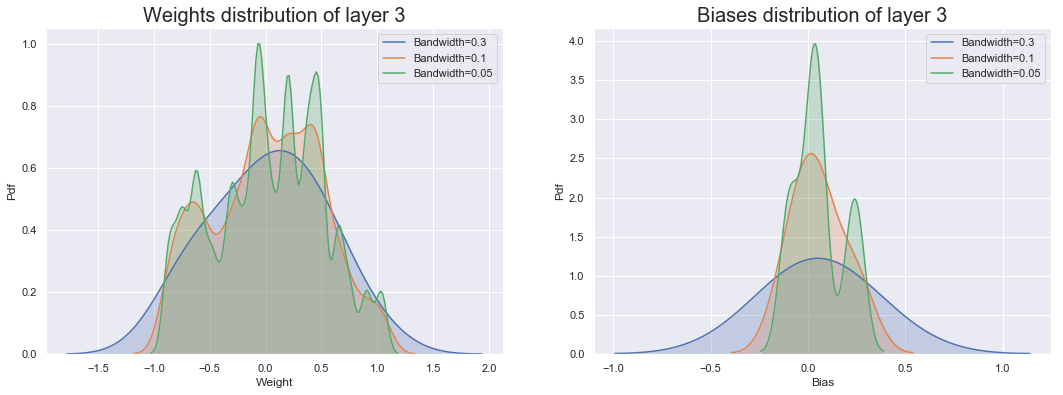

In [9]:
for i in range(numLayers):
    j = 2*i
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    wghs = weights[j].flatten()
    sns.kdeplot(wghs, bw=.3, shade=True, label="Bandwidth=0.3")
    sns.kdeplot(wghs, bw=.1, shade=True, label="Bandwidth=0.1")
    sns.kdeplot(wghs, bw=.05, shade=True, label="Bandwidth=0.05")
    title = "Weights distribution of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Weight")
    plt.ylabel("Pdf")
    
    plt.subplot(1,2,2)
    j = 2*i + 1
    wghs = weights[j].flatten()
    sns.kdeplot(wghs, bw=.3, shade=True, label="Bandwidth=0.3")
    sns.kdeplot(wghs, bw=.1, shade=True, label="Bandwidth=0.1")
    sns.kdeplot(wghs, bw=.05, shade=True, label="Bandwidth=0.05")
    title = "Biases distribution of layer "+str(i+1)
    plt.title(title,fontsize=20)
    plt.xlabel("Bias")
    plt.ylabel("Pdf")
plt.show()